In [1]:
import pandas as pd
import numpy as np  
import re
import nltk 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("TitleDataSet\clickbait_data.csv")

In [3]:
features = df['headline'].values
labels = df['clickbait'].values

In [4]:
newFeatures = []
for sentence in range(0, len(features)):
    newFeature = re.sub(r'\W', ' ', str(features[sentence]))  #special char
    newFeature= re.sub(r'\s+[a-zA-Z]\s+', ' ', newFeature)    #single char
    newFeature = re.sub(r'\s+', ' ', newFeature, flags=re.I)  #spaces
    newFeature = newFeature.lower()
    newFeatures.append(newFeature)

In [5]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
newFeatures = vectorizer.fit_transform(newFeatures).toarray()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(newFeatures, labels, test_size=0.2, random_state=42)

In [27]:
len(X_train)

25600

In [7]:
s=SVC(kernel='linear',gamma='scale')
s.fit(X_train,y_train)
predictions=s.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_test, predictions)

In [8]:
print("Support Vector Classification Results: \n")
print(classification_report(y_test,predictions))

Support Vector Classification Results: 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3127
           1       0.96      0.93      0.95      3273

    accuracy                           0.95      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.95      0.95      0.95      6400



In [9]:
accuracySvc = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracySvc * 100.0))

Accuracy: 94.67%


In [14]:
r = RandomForestClassifier(n_estimators=20, random_state=0)
r.fit(X_train, y_train)
predictionsR = r.predict(X_test)

In [19]:
cm_r = confusion_matrix(y_test, predictionsR)

In [15]:
print("Random Forest Results: \n")
print(classification_report(y_test,predictionsR))

Random Forest Results: 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3127
           1       0.91      0.93      0.92      3273

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



In [16]:
accuracyR = accuracy_score(y_test, predictionsR)
print("Accuracy: %.2f%%" % (accuracyR * 100.0))

Accuracy: 91.84%


In [11]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression(C=0.01,solver='liblinear')
l.fit(X_train,y_train)
predictionsL=l.predict(X_test)

In [20]:
cm_lr = confusion_matrix(y_test, predictionsL)

In [12]:
print("Logistic Regression Results: \n")
print(classification_report(y_test,predictionsL))

Logistic Regression Results: 

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3127
           1       0.97      0.82      0.89      3273

    accuracy                           0.90      6400
   macro avg       0.90      0.90      0.89      6400
weighted avg       0.91      0.90      0.89      6400



In [13]:
accuracyL = accuracy_score(y_test, predictionsL)
print("Accuracy: %.2f%%" % (accuracyL * 100.0))

Accuracy: 89.50%


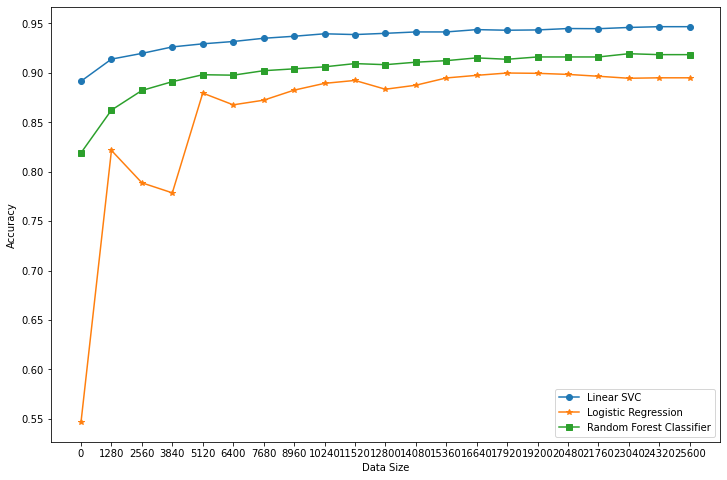

In [28]:
def plot_acc_curve(classifier, linestyle, label):    
    
    num_of_splits = 20
    each_split_size = len(X_train)//num_of_splits

    each_split = 1280
    scores = []

    for i in range(num_of_splits+1):
        split_X_train = X_train[0:each_split]
        split_y_train = y_train[0:each_split]

        each_split += each_split_size

        classifier.fit(split_X_train, split_y_train)
        scores.append(classifier.score(X_test, y_test))
    
    m = 20
    n = 1280
    x_splits = list(range(0, (m+1)*n, n))

    plt.xlabel('Data Size')
    plt.ylabel('Accuracy')
    plt.plot(x_splits, scores, linestyle, label = label)
    plt.xticks(x_splits)
    plt.legend(loc="best")
    
    return plt
    

plt.figure(figsize=(12,8))

# Linear SVC
plot_acc_curve(s, linestyle = 'o-', label="Linear SVC")

plot_acc_curve(l, linestyle = '*-', label="Logistic Regression")

plot_acc_curve(r, linestyle = 's-', label="Random Forest Classifier")


plt.show()


In [21]:
def acc_each_category(cf_matrix):
    correctly_classified = np.diagonal(cf_matrix)
    return correctly_classified

y = cm_lr.sum(axis=1)

z1 = acc_each_category(cm_svc)
z2 = acc_each_category(cm_lr)
z3 = acc_each_category(cm_r)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

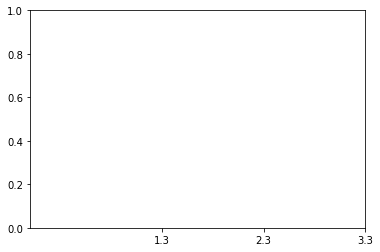

In [22]:
import matplotlib.pyplot as plt

x_tick = np.unique(y_test)
w = 0.125
x1 = np.array([1,2,3])
x2 = x1+w
x3 = x2+w
x4 = x3+w

plt.xticks(ticks=x1+0.3, labels=x_tick)
plt.bar(x1, y, w, label = "Total Video Title")
plt.bar(x2, z1, w, label = "Linear SVC")
plt.bar(x3, z2, w, label = "Logistic Regression",)
plt.bar(x4, z3, w, label = "Random Forest Classifier")


plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Category")
plt.ylabel("Number of Video Title")
plt.legend()
plt.show()